In [4]:
from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices
%pylab inline
#%matplotlib
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [5]:
filename = "shortened.csv"

#create sample dataframe 
global_temp_city  = pd.read_csv(filename).dropna()
#global_temp_city = global_temp_city.drop('Unnamed: 0', 1)   #this is here for if we used the random files that albert added on github

#format dt column to be a datetime value 
global_temp_city['dt'] =  pd.to_datetime(global_temp_city['dt'])
global_temp_city['AverageTemperature'] = global_temp_city['AverageTemperature']*(1.8)+32
global_temp_city[:6]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01 00:00:00,42.9224,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01 00:00:00,42.4184,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01 00:00:00,51.1592,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01 00:00:00,57.2918,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01 00:00:00,60.9476,1.396,Århus,Denmark,57.05N,10.33E
10,1744-09-01 00:00:00,55.0058,1.454,Århus,Denmark,57.05N,10.33E


In [6]:
#create new column for year and average temp for each year 
global_temp_city['year']= global_temp_city['dt'].map(lambda x: x.date().year)
global_temp_city[0:6]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year
0,1743-11-01 00:00:00,42.9224,1.737,Århus,Denmark,57.05N,10.33E,1743
5,1744-04-01 00:00:00,42.4184,3.624,Århus,Denmark,57.05N,10.33E,1744
6,1744-05-01 00:00:00,51.1592,1.283,Århus,Denmark,57.05N,10.33E,1744
7,1744-06-01 00:00:00,57.2918,1.347,Århus,Denmark,57.05N,10.33E,1744
8,1744-07-01 00:00:00,60.9476,1.396,Århus,Denmark,57.05N,10.33E,1744
10,1744-09-01 00:00:00,55.0058,1.454,Århus,Denmark,57.05N,10.33E,1744


In [7]:
yearlyAvgCountryTemps = global_temp_city.groupby(['Country','year'])['AverageTemperature'].mean()


# create dataframe with info
yearlyAvgCountryTempsDF = DataFrame({'avgTemp':yearlyAvgCountryTemps.values,'temporary':yearlyAvgCountryTemps.index.values})
yearlyAvgCountryTempsDF['Country'] = yearlyAvgCountryTempsDF['temporary'].map(lambda x : x[0])
yearlyAvgCountryTempsDF['year'] = yearlyAvgCountryTempsDF['temporary'].map(lambda x : x[1])
yearlyAvgCountryTempsDF = yearlyAvgCountryTempsDF.drop('temporary', 1)   

yearlyAvgCountryTempsDF

,avgTemp,Country,year
0,59.976050,Australia,1841
1,60.106700,Australia,1842
2,60.593450,Australia,1843
3,59.462450,Australia,1844
4,60.124400,Australia,1845
5,61.007750,Australia,1846
6,60.120950,Australia,1847
7,59.553500,Australia,1848
8,59.350550,Australia,1849
9,60.222691,Australia,1850


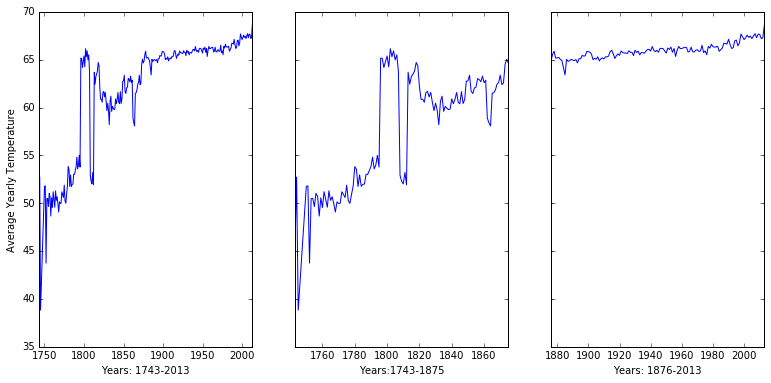

In [8]:
# average temperatures for different years
yearlyAvgTemps = global_temp_city.groupby('year')['AverageTemperature'].mean()
yearlyTempCount = global_temp_city.groupby('year')['AverageTemperature'].count()

# create dataframe with info
yearlyAvgTempsDF = DataFrame({'avgTemp':yearlyAvgTemps.values,'year':yearlyAvgTemps.index.values})


#built this subplot to look at the avg temp per year and compare two different time frames where the temperature 
#measurements seem to be wildly different. I think this has to do with thermometer technology improving over time
#first plot shows all years, second plot shows 1743-1875, third shows 1876 -2013
fig, (ax1,ax2,ax3)= subplots(nrows=1, ncols=3,sharey=True,figsize=(13,6))
yearlyAvgTemps.plot(ax=ax1)
ax1.set_ylabel('Average Yearly Temperature')
ax1.set_xlabel('Years: 1743-2013')
yearlyAvgTemps[:129].plot(ax=ax2)
ax2.set_xlabel('Years:1743-1875')
yearlyAvgTemps[129:].plot(ax=ax3)
ax3.set_xlabel('Years: 1876-2013')

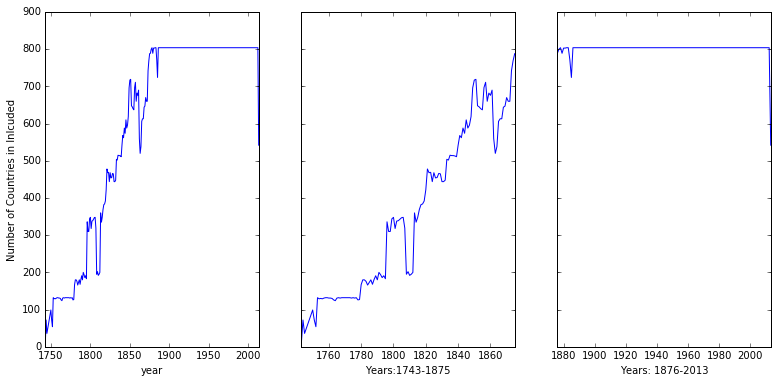

In [9]:
fig2, (ax1,ax2,ax3)= subplots(nrows=1, ncols=3,sharey=True,figsize=(13,6))
yearlyTempCount.plot(ax=ax1)
ax1.set_ylabel('Number of Countries in Inlcuded')
ax2.set_xlabel('Years: 1743-2013')
yearlyTempCount[:129].plot(ax=ax2)
ax2.set_xlabel('Years:1743-1875')
yearlyTempCount[129:].plot(ax=ax3)
ax3.set_xlabel('Years: 1876-2013')

In [10]:
#Some descriptive stats to show the differences in the time periods that we described above.
#Here we can clearly see through the STD Dev that the first time period had really spread out measurements 
#it stabilized in the second period
DF2= DataFrame()
DF2['All Years']=yearlyAvgTemps.describe()
DF2['1742-1875'] = yearlyAvgTemps[:129].describe()
DF2['1876-2013'] = yearlyAvgTemps[129:].describe()
DF2

,All Years,1742-1875,1876-2013
count,267.000000,129.000000,138.000000
mean,61.916306,57.574621,65.974837
std,5.916471,5.942676,0.792724
min,38.835700,38.835700,63.427247
25%,60.420639,51.822200,65.445815
50%,65.044537,60.138412,65.907179
75%,65.926373,62.587498,66.328485
max,68.605796,66.166098,68.605796


In [11]:
# Now i want to run a regression usuing the yearlyAvgTemps buy separating them by the time periods.

In [12]:
all_years = pd.ols(x=yearlyAvgTempsDF['year'],y=yearlyAvgTempsDF['avgTemp'])
first_group = pd.ols(x=yearlyAvgTempsDF['year'][:129],y=yearlyAvgTempsDF['avgTemp'][:129])
second_group = pd.ols(x=yearlyAvgTempsDF['year'][129:],y=yearlyAvgTempsDF['avgTemp'][129:])


In [13]:
#i printed the result and what I see is that the change over time can be better explained by the change in years
#when separated. the change in temperature  can be better explained by the increase in years after 1875.
print all_years
print first_group
print second_group


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         267
Number of Degrees of Freedom:   2

R-squared:         0.6868
Adj R-squared:     0.6856

Rmse:              3.3172

F-stat (1, 265):   581.1750, p-value:     0.0000

Degrees of Freedom: model 1, resid 265

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.0634     0.0026      24.11     0.0000     0.0583     0.0686
     intercept   -57.3345     4.9508     -11.58     0.0000   -67.0381   -47.6310
---------------------------------End of Summary---------------------------------


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         129
Number

In [14]:
# add city, country column to main DF
global_temp_city["city_country"] = global_temp_city["City"]+", "+global_temp_city['Country']
#a mask that filters out the years so we can filter out the old data that we decided not to use for analysis
year_mask = (global_temp_city['year']>1875)
global_temp_city_masked = global_temp_city[year_mask]


In [15]:
# merge original dataframe with yearly averages dataframe
global_temp_city_w_yrlyAvg = pd.merge(global_temp_city_masked, yearlyAvgTempsDF,\
                          left_on = 'year', right_on = 'year',\
                           suffixes=['_alldata','avgYearTemps'])
global_temp_city_w_yrlyAvg[:10]


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,city_country,avgTemp
0,1876-01-01 00:00:00,30.8300,0.621,Århus,Denmark,57.05N,10.33E,1876,"Århus, Denmark",64.878889
1,1876-02-01 00:00:00,30.6014,0.850,Århus,Denmark,57.05N,10.33E,1876,"Århus, Denmark",64.878889
2,1876-03-01 00:00:00,35.0924,1.432,Århus,Denmark,57.05N,10.33E,1876,"Århus, Denmark",64.878889
3,1876-04-01 00:00:00,42.6794,0.963,Århus,Denmark,57.05N,10.33E,1876,"Århus, Denmark",64.878889
4,1876-05-01 00:00:00,48.3494,0.766,Århus,Denmark,57.05N,10.33E,1876,"Århus, Denmark",64.878889
5,1876-06-01 00:00:00,60.1466,0.418,Århus,Denmark,57.05N,10.33E,1876,"Århus, Denmark",64.878889
6,1876-07-01 00:00:00,62.3480,0.593,Århus,Denmark,57.05N,10.33E,1876,"Århus, Denmark",64.878889
7,1876-08-01 00:00:00,61.6262,0.370,Århus,Denmark,57.05N,10.33E,1876,"Århus, Denmark",64.878889
8,1876-09-01 00:00:00,54.1328,0.611,Århus,Denmark,57.05N,10.33E,1876,"Århus, Denmark",64.878889
9,1876-10-01 00:00:00,47.6546,0.608,Århus,Denmark,57.05N,10.33E,1876,"Århus, Denmark",64.878889


In [16]:
# average temperatures for all years for different cities
cityAvgTempsAllYrs = global_temp_city_masked.groupby(['city_country','Latitude','Longitude'])['AverageTemperature'].mean()

#create dataframe with information (because series suck)
cityAvgTempsAllYrsDF = DataFrame({'temporary':cityAvgTempsAllYrs.index.values,\
                           'avgTemp':cityAvgTempsAllYrs.values})
cityAvgTempsAllYrsDF['city_country'] = cityAvgTempsAllYrsDF['temporary'].map(lambda x : x[0])
cityAvgTempsAllYrsDF['lat'] = cityAvgTempsAllYrsDF['temporary'].map(lambda x : x[1])
cityAvgTempsAllYrsDF['long'] = cityAvgTempsAllYrsDF['temporary'].map(lambda x : x[2])
cityAvgTempsAllYrsDF = cityAvgTempsAllYrsDF.drop('temporary', 1)          


cityAvgTempsAllYrsDF[:10]

,avgTemp,city_country,lat,long
0,55.939091,"A Coruña, Spain",42.59N,8.73W
1,48.227964,"Aachen, Germany",50.63N,6.34E
2,46.241722,"Aalborg, Denmark",57.05N,10.33E
3,79.951273,"Aba, Nigeria",5.63N,8.07E
4,77.308226,"Abadan, Iran",29.74N,48.00E
5,79.951273,"Abakaliki, Nigeria",5.63N,8.07E
6,31.361256,"Abakan, Russia",53.84N,91.36E
7,45.327753,"Abbotsford, Canada",49.03N,122.45W
8,79.690309,"Abengourou, Côte D'Ivoire",7.23N,4.05W
9,79.521939,"Abeokuta, Nigeria",7.23N,4.05E


In [17]:
# average temperatures each year for different cities
cityAvgTempsEachYr = global_temp_city_masked.groupby(['city_country','Latitude','Longitude','year'])['AverageTemperature'].mean()

#create dataframe with information (because series suck)
cityAvgTempsEachYrDF = DataFrame({'temporary':cityAvgTempsEachYr.index.values,\
                           'avgTemp':cityAvgTempsEachYr.values})
cityAvgTempsEachYrDF['city_country'] = cityAvgTempsEachYrDF['temporary'].map(lambda x : x[0])
cityAvgTempsEachYrDF['lat'] = cityAvgTempsEachYrDF['temporary'].map(lambda x : x[1])
cityAvgTempsEachYrDF['long'] = cityAvgTempsEachYrDF['temporary'].map(lambda x : x[2])
cityAvgTempsEachYrDF['year'] = cityAvgTempsEachYrDF['temporary'].map(lambda x : x[3])
cityAvgTempsEachYrDF = cityAvgTempsEachYrDF.drop('temporary', 1)          


print cityAvgTempsEachYrDF[:20]

     avgTemp     city_country     lat   long  year
0   55.61075  A Coruña, Spain  42.59N  8.73W  1876
1   55.88285  A Coruña, Spain  42.59N  8.73W  1877
2   55.35350  A Coruña, Spain  42.59N  8.73W  1878
3   54.07535  A Coruña, Spain  42.59N  8.73W  1879
4   55.10795  A Coruña, Spain  42.59N  8.73W  1880
5   56.12900  A Coruña, Spain  42.59N  8.73W  1881
6   54.99725  A Coruña, Spain  42.59N  8.73W  1882
7   54.06950  A Coruña, Spain  42.59N  8.73W  1883
8   54.84785  A Coruña, Spain  42.59N  8.73W  1884
9   54.07070  A Coruña, Spain  42.59N  8.73W  1885
10  54.56915  A Coruña, Spain  42.59N  8.73W  1886
11  54.72425  A Coruña, Spain  42.59N  8.73W  1887
12  53.99705  A Coruña, Spain  42.59N  8.73W  1888
13  53.60915  A Coruña, Spain  42.59N  8.73W  1889
14  54.06635  A Coruña, Spain  42.59N  8.73W  1890
15  54.20285  A Coruña, Spain  42.59N  8.73W  1891
16  54.71585  A Coruña, Spain  42.59N  8.73W  1892
17  56.58020  A Coruña, Spain  42.59N  8.73W  1893
18  54.95240  A Coruña, Spain  

In [18]:
# create pivottable/timeseries
date_city_pivot = pd.pivot_table(cityAvgTempsEachYrDF,\
                                index='year',\
                                columns='city_country')
date_city_pivot[:100]

avgTemp                                                \
city_country A Coruña, Spain Aachen, Germany Aalborg, Denmark Aba, Nigeria   
year                                                                         
1876                55.61075        47.95955         44.55440     78.79820   
1877                55.88285        47.98355         44.18000     79.61585   
1878                55.35350        47.90000         46.48760     79.41470   
1879                54.07535        45.01115         43.05200     78.23990   
1880                55.10795        48.16820         46.13555     78.79310   
1881                56.12900        46.66865         42.89150     79.37675   
1882                54.99725        47.84495         46.85090     78.83990   
1883                54.06950        47.47925         45.69455     79.41890   
1884                54.84785        48.67970         46.82045     78.85400   
1885                54.07070        46.96730         44.65925     78.90800   
1886                54.56915        47.69285         44.79350     78.68060   
1887                54.72425        45.70520         44.99195     77.45855   
1888                53.99705        45.72815         42.96230     78.16460   
1889                53.60915        46.31660         45.98075     78.41525   
1890                54.06635        45.87875         45.59240     76.86800   
1891                54.20285        46.57205         45.50045     77.94680   
1892                54.71585        46.81790         44.27405     78.18725   
1893                56.58020        48.20360         44.94215     78.20840   
1894                54.95240        47.84765         46.94795     78.56285   
1895                56.23385        46.49810         44.63360     78.81125   
1896                54.78650        46.77470         46.71275     78.68540   
1897                56.55725        47.78105         45.97055     79.44455   
1898                55.90490        48.54290         46.39715     78.43985   
1899                57.64565        48.08540         46.52540     79.56035   
1900                55.88225        48.43850         45.27545     79.55390   
1901                54.99215        47.01155         46.17620     79.61960   
1902                55.09100        46.64045         43.77680     78.80315   
1903                55.45070        48.18920         46.09550     78.57665   
1904                56.02835        48.17720         45.63875     77.61575   
1905                54.83840        47.42795         46.05605     79.36745   
...                      ...             ...              ...          ...   
1946                55.26500        48.10820         46.20500     80.29295   
1947                56.56130        49.02155         45.28355     80.61950   
1948                57.46925        49.27820         47.25515     80.06600   
1949                57.54665        49.53395         48.61250     80.51990   
1950                56.21165        48.53075         46.80575     80.06405   
1951                55.09910        48.81605         46.64255     80.13350   
1952                56.05580        47.80670         44.91455     79.98410   
1953                56.42585        49.21430         47.97995     80.07395   
1954                55.28195        47.43530         45.55100     79.55750   
1955                57.24320        47.23700         45.43055     79.60355   
1956                54.38705        45.99995         44.40995     79.33085   
1957                56.07080        48.99485         46.68905     80.08160   
1958                55.91420        48.28490         45.25940     80.21855   
1959                56.66315        50.13965         47.95625     80.26865   
1960                55.94435        48.76055         46.02365     80.16770   
1961                57.49430        49.58135         47.71445     79.83245   
1962                55.82330        46.13105         44.98190     79.91315   
1963                55.24265        45.8219

In [19]:
test1 = date_city_pivot - date_city_pivot.shift(1)

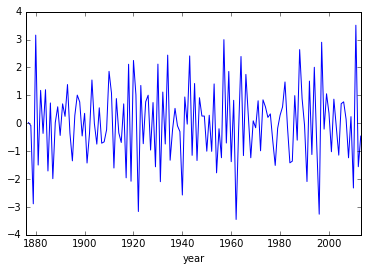

In [20]:
#print test1['avgTemp']['Aachen, Germany']
test1['avgTemp']['Aachen, Germany'].plot()

In [21]:
def regressOnYr(s):
    sDF = DataFrame({'year':s.index.values,\
                           'temps':s.values})
    result = pd.ols(x=sDF['year'],y=sDF['temps'])
    return result
    
    

In [22]:
timeOnAvgTempEachCity = date_city_pivot.apply(regressOnYr)

#change to datafram
timeOnAvgTempEachCityDF = DataFrame({'temporary':timeOnAvgTempEachCity.index.values,\
                           'regResults':timeOnAvgTempEachCity.values})
timeOnAvgTempEachCityDF['city_country'] = timeOnAvgTempEachCityDF['temporary'].map(lambda x : x[1])
timeOnAvgTempEachCityDF = timeOnAvgTempEachCityDF.drop('temporary', 1) 

#add relevant regression information to DF
timeOnAvgTempEachCityDF['slope']=timeOnAvgTempEachCityDF['regResults'].map(lambda x: x.beta['x'])
timeOnAvgTempEachCityDF['Y-intercept']=timeOnAvgTempEachCityDF['regResults'].map(lambda x: x.beta['intercept'])
timeOnAvgTempEachCityDF['R2']=timeOnAvgTempEachCityDF['regResults'].map(lambda x: x.r2)
timeOnAvgTempEachCityDF['pval']=timeOnAvgTempEachCityDF['regResults'].map(lambda x: x.p_value)

timeOnAvgTempEachCityDF[:10]


,regResults,city_country,slope,Y-intercept,R2,pval
0,\n-------------------------Summary of Regressi...,"A Coruña, Spain",0.016881,23.117796,0.406746,x 4.032884e-17 intercept 3.03102...
1,\n-------------------------Summary of Regressi...,"Aachen, Germany",0.018675,11.916006,0.325065,x 2.896665e-13 intercept 8.87412...
2,\n-------------------------Summary of Regressi...,"Aalborg, Denmark",0.017372,12.464129,0.205256,x 2.411188e-08 intercept 3.05030...
3,\n-------------------------Summary of Regressi...,"Aba, Nigeria",0.017728,45.480336,0.588105,x 5.661970e-28 intercept 1.10586...
4,\n-------------------------Summary of Regressi...,"Abadan, Iran",0.019134,40.109772,0.395302,x 1.499142e-16 intercept 2.12907...
5,\n-------------------------Summary of Regressi...,"Abakaliki, Nigeria",0.017728,45.480336,0.588105,x 5.661970e-28 intercept 1.10586...
6,\n-------------------------Summary of Regressi...,"Abakan, Russia",0.025204,-17.636008,0.330797,x 1.608348e-13 intercept 3.74389...
7,\n-------------------------Summary of Regressi...,"Abbotsford, Canada",0.014730,16.693676,0.216192,x 9.171591e-09 intercept 4.95786...
8,\n-------------------------Summary of Regressi...,"Abengourou, Côte D'Ivoire",0.017972,44.742747,0.606127,x 2.662566e-29 intercept 5.35200...
9,\n-------------------------Summary of Regressi...,"Abeokuta, Nigeria",0.017852,44.807147,0.548558,x 2.986384e-25 intercept 1.75219...


In [23]:
#load all indicator files  

filename = "agricultureland.csv"

#create sample dataframe 
agland  = pd.read_csv(filename).dropna()

filename = "arableland.csv"

#create sample dataframe 
arableland  = pd.read_csv(filename).dropna()

filename = "avgPrec.csv"

#create sample dataframe 
avgPrec  = pd.read_csv(filename).dropna()

filename = "CO2emissions.csv"

#create sample dataframe 
CO2  = pd.read_csv(filename).dropna()

filename = "cropProduction.csv"

#create sample dataframe 
cropProd  = pd.read_csv(filename).dropna()

filename = "foodProduction.csv"

#create sample dataframe 
foodProd  = pd.read_csv(filename).dropna()

filename = "Livestock.csv"

#create sample dataframe 
livestock  = pd.read_csv(filename).dropna()

indicatorFile = [agland,arableland,avgPrec,CO2,cropProd,foodProd,livestock]
file = livestock
file[file['Year']>=1966]

,CountryName,CountryCode,Year,Livestock production index (2004-2006 = 100)
1064,Arab World,ARB,1966,23.773989
1065,Caribbean small states,CSS,1966,32.662614
1066,East Asia & Pacific (all income levels),EAS,1966,18.455298
1067,East Asia & Pacific (developing only),EAP,1966,12.018219
1068,Euro area,EMU,1966,65.681145
1069,European Union,EUU,1966,70.856480
1070,Fragile and conflict affected situations,FCS,1966,35.598219
1071,Heavily indebted poor countries (HIPC),HPC,1966,38.632388
1072,High income,HIC,1966,61.607012
1073,High income: nonOECD,NOC,1966,50.997327


In [24]:
[agland,arableland,avgPrec,CO2,cropProd,foodProd,livestock]
# merge first two indicator tables
CO2Ag = pd.merge(agland, CO2, how='outer',left_on=['CountryName','CountryCode', 'Year'],\
                 right_on=['CountryName','CountryCode', 'Year'])

arablePrec = pd.merge(arableland, avgPrec, how='outer',left_on=['CountryName','CountryCode', 'Year'],\
                      right_on=['CountryName','CountryCode', 'Year'])

cropfood = pd.merge(cropProd, foodProd, how='outer',left_on=['CountryName','CountryCode', 'Year'],\
                    right_on=['CountryName','CountryCode', 'Year'])

CO2Aglivestock = pd.merge(livestock, CO2Ag, how='outer',left_on=['CountryName','CountryCode', 'Year'],\
                          right_on=['CountryName','CountryCode', 'Year'])

arablePrecCO2Aglivestock = pd.merge(CO2Aglivestock, arablePrec, how='outer',left_on=['CountryName','CountryCode', 'Year'],\
                          right_on=['CountryName','CountryCode', 'Year'])
indicators = pd.merge(arablePrecCO2Aglivestock, cropfood, how='outer',left_on=['CountryName','CountryCode', 'Year'],\
                          right_on=['CountryName','CountryCode', 'Year'])





indicators[indicators['Year']==1965]

,CountryName,CountryCode,Year,Livestock production index (2004-2006 = 100),Agricultural land (% of land area),CO2 emissions (kt),Arable land (% of land area),Average precipitation in depth (mm per year),Crop production index (2004-2006 = 100),Food production index (2004-2006 = 100)
846,Arab World,ARB,1965.0,22.793490,30.999636,1.238282e+05,3.462338,NaN,31.795426,27.293291
847,Caribbean small states,CSS,1965.0,30.059549,5.484190,1.191775e+04,1.707016,NaN,101.379313,77.713674
848,East Asia & Pacific (all income levels),EAS,1965.0,17.864576,44.399483,1.135837e+06,8.493882,NaN,26.371134,23.002059
849,East Asia & Pacific (developing only),EAP,1965.0,11.306425,36.667820,5.594568e+05,9.972979,NaN,23.570290,19.381803
850,Euro area,EMU,1965.0,63.117690,55.761034,1.553826e+06,29.894423,NaN,71.991434,67.252111
851,European Union,EUU,1965.0,68.445426,54.226703,2.977353e+06,31.204470,NaN,75.121315,70.232506
852,Fragile and conflict affected situations,FCS,1965.0,33.527893,31.384044,5.090084e+04,4.726422,NaN,35.427166,34.675009
853,Heavily indebted poor countries (HIPC),HPC,1965.0,36.736523,35.643913,2.762330e+04,5.206312,NaN,37.519595,36.566626
854,High income,HIC,1965.0,59.961344,38.395450,8.453127e+06,10.716482,NaN,57.590841,56.388611
855,High income: nonOECD,NOC,1965.0,46.548666,NaN,NaN,NaN,NaN,35.640224,38.385936


In [25]:
#merge cityAvgTempsEachYrDF with indicator table
cityDataPerYr = pd.merge(yearlyAvgCountryTempsDF, indicators, left_on=['Country','year'],right_on=['CountryName',\
                                                'Year'])

cityDataPerYr = cityDataPerYr.drop('CountryName', 1)
cityDataPerYr = cityDataPerYr.drop('Year', 1) 

cityDataPerYr

,avgTemp,Country,year,CountryCode,Livestock production index (2004-2006 = 100),Agricultural land (% of land area),CO2 emissions (kt),Arable land (% of land area),Average precipitation in depth (mm per year),Crop production index (2004-2006 = 100),Food production index (2004-2006 = 100)
0,60.035900,Australia,1960,AUS,NaN,NaN,88202.351,NaN,NaN,NaN,NaN
1,62.259200,Australia,1961,AUS,51.45,60.084220,90589.568,3.929162,NaN,24.96,38.95
2,61.338950,Australia,1962,AUS,56.45,60.357966,94912.961,4.178827,534.0,29.85,44.13
3,61.274900,Australia,1963,AUS,59.12,60.720227,101029.517,4.300014,NaN,30.23,45.94
4,59.898050,Australia,1964,AUS,61.43,61.050597,108979.573,4.605392,NaN,34.23,49.03
5,61.526150,Australia,1965,AUS,62.47,61.566979,120966.996,4.811840,NaN,28.92,47.22
6,60.557000,Australia,1966,AUS,60.84,61.720318,120332.605,5.156529,NaN,40.14,51.92
7,61.436300,Australia,1967,AUS,60.76,62.055374,129265.417,5.373130,534.0,31.14,47.14
8,61.018850,Australia,1968,AUS,61.83,61.807141,134622.904,5.387709,NaN,44.97,54.26
9,60.471050,Australia,1969,AUS,64.38,62.343699,142257.598,5.402028,NaN,37.61,51.30


In [32]:
#Define a function to convert the North and South latitude to scalable items
def stripNS(string):
    if string[-1] == 'N':
        string = string.rstrip('N')
        string = float(string) * 1
    else:
        string = string.rstrip('S')
        string = float(string) * -1
    return string
#Apply the function to all rows of ['lat']
cityAvgTempsAllYrsDF['lat'] = cityAvgTempsAllYrsDF['lat'].apply(stripNS)

In [35]:
print cityAvgTempsAllYrsDF[:3]

     avgTemp      city_country    lat    long
0  55.939091   A Coruña, Spain  42.59   8.73W
1  48.227964   Aachen, Germany  50.63   6.34E
2  46.241722  Aalborg, Denmark  57.05  10.33E


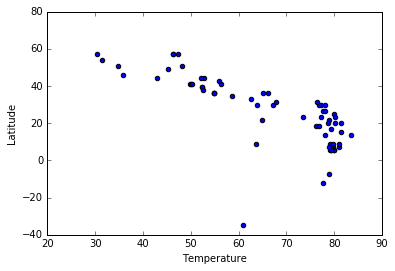

In [36]:
#Visualize the relationship between average temperature and latitude
sc = scatter(cityAvgTempsAllYrsDF['avgTemp'],cityAvgTempsAllYrsDF['lat'], cmap= 'bwr')
xlabel('Temperature')
ylabel('Latitude')

In [29]:
#Initial K-means
from sklearn.cluster import KMeans

In [30]:
model = KMeans(n_clusters=5, random_state=1)

In [71]:
X= cityAvgTempsAllYrsDF[['avgTemp','lat']].values

In [72]:
model.fit(X)


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

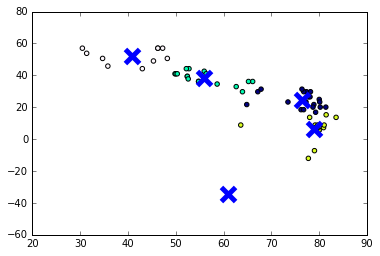

In [73]:
scatter(X[:,0], X[:,1], c=model.labels_, cmap='gist_ncar')
scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker="x", s=200, linewidths=5)